<a href="https://colab.research.google.com/github/rohanrjp/DataScience/blob/main/GhostMap_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
!pip install folium

In [15]:
deaths=pd.read_csv("/deaths.csv")
deaths.head()
print(deaths.info)

<bound method DataFrame.info of      Death  X coordinate  Y coordinate
0        1     51.513418     -0.137930
1        1     51.513418     -0.137930
2        1     51.513418     -0.137930
3        1     51.513361     -0.137883
4        1     51.513361     -0.137883
..     ...           ...           ...
484      1     51.514706     -0.137065
485      1     51.514706     -0.137065
486      1     51.512311     -0.138474
487      1     51.511998     -0.138123
488      1     51.511856     -0.137762

[489 rows x 3 columns]>


In [16]:
newcols={
    "Death":"death_count",
    "X coordinate":"x_latitude",
    "Y coordinate":"y_longitude"
}
deaths.rename(columns=newcols,inplace=True)
deaths.head()

,death_count,x_latitude,y_longitude
0,1,51.513418,-0.137930
1,1,51.513418,-0.137930
2,1,51.513418,-0.137930
3,1,51.513361,-0.137883
4,1,51.513361,-0.137883


In [17]:
locations=deaths[["x_latitude","y_longitude"]]
deaths_list=locations.values.tolist()
print(len(deaths_list))

489


In [22]:
import folium

map = folium.Map(location=[51.5132119,-0.13666], zoom_start=17)
for point in range(0, len(deaths_list)):
    folium.CircleMarker(deaths_list[point], radius=8, color='red', fill=True, fill_color='red', opacity = 0.4).add_to(map)
map

In [23]:
pumps=pd.read_csv("/pumps.csv")

location_pumps=pumps[["X coordinate","Y coordinate"]]

location_pumps_list=location_pumps.values.tolist()



In [24]:
map1=map
for point in range(0,len(location_pumps_list)):
  folium.Marker(location_pumps_list[point], popup=pumps['Pump Name'][point]).add_to(map1)
map1

In [30]:
dates=pd.read_csv("/dates.csv",parse_dates=['date'])

handle_removed=pd.to_datetime("1854/9/8")

dates["DayName"]=dates.date.dt.day_name()

dates["Handle"]=dates.date>handle_removed

dates.groupby(["Handle"]).sum()


<ipython-input-30-76ddef7b4402>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dates.groupby(["Handle"]).sum()


,order,attacks,deaths
Handle,,,
False,231,528,500
True,715,43,116


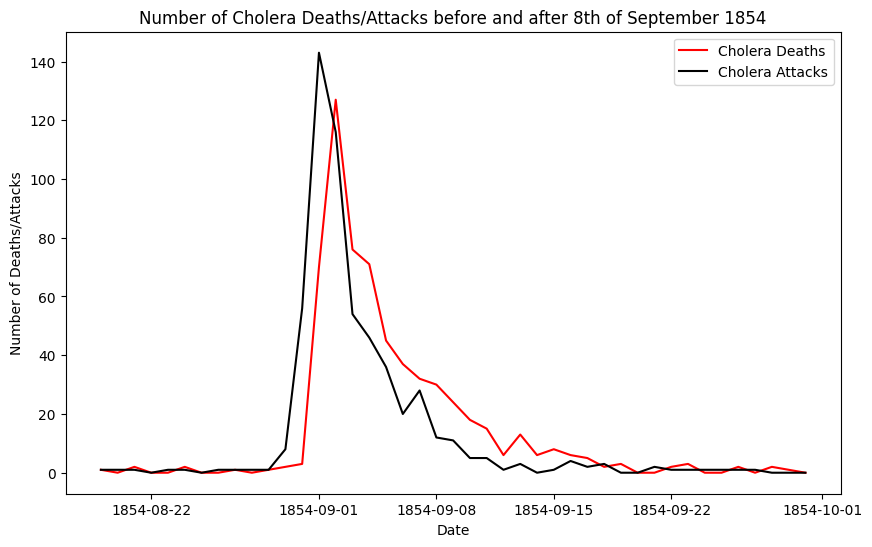

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dates['date'], dates['deaths'], color='red', label='Cholera Deaths')
plt.plot(dates['date'], dates['attacks'], color='black', label='Cholera Attacks')
plt.xlabel('Date')
plt.ylabel('Number of Deaths/Attacks')
plt.title('Number of Cholera Deaths/Attacks before and after 8th of September 1854')
plt.legend()
plt.show()